In [ ]:
!pip install tensorflow==2.0.0

In [ ]:
import tensorflow as tf

tf.__version__

'2.1.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
len(X_train)

25000

In [ ]:
X_train.shape

(25000,)

In [ ]:
X_train.max()

19999

In [ ]:
X_train = pad_sequences(X_train, maxlen = 500)
X_test = pad_sequences(X_test, maxlen=500)

In [ ]:
X_train.shape

(25000, 500)

In [ ]:
X_train[0].shape

(500,)

In [ ]:
vocab_size = 20000
embed_size = 128

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=128, activation='tanh', return_sequences = True),)
model.add(LSTM(units=256, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 128)          2560000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 500, 128)          131584    
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 3,086,081
Trainable params: 3,086,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 26s 1ms/sample - loss: 0.5191 - accuracy: 0.7496 - val_loss: 0.3864 - val_accuracy: 0.8296
Epoch 2/5
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.2671 - accuracy: 0.8915 - val_loss: 0.3644 - val_accuracy: 0.8412
Epoch 3/5
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.1631 - accuracy: 0.9404 - val_loss: 0.3830 - val_accuracy: 0.8336
Epoch 4/5
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.0973 - accuracy: 0.9686 - val_loss: 0.4576 - val_accuracy: 0.8392
Epoch 5/5
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.0574 - accuracy: 0.9812 - val_loss: 0.6206 - val_accuracy: 0.8296


In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

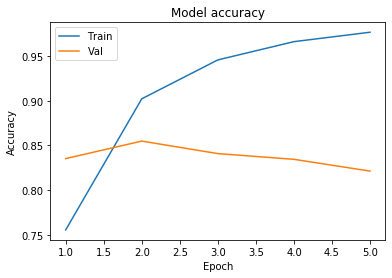

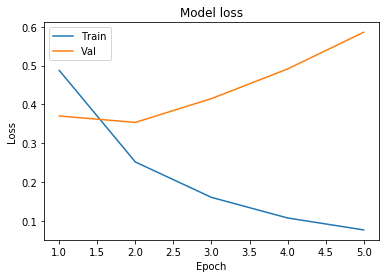

In [ ]:
plot_learningCurve(history, 5)

In [ ]:
model.evaluate(x=X_test, y=y_test, verbose=2)

25000/25000 - 3s - loss: 0.5686 - accuracy: 0.8241


[0.5686165504717827, 0.82408]

In [ ]:
text = "This is a good review"

np.array(text)

array('This is a good review', dtype='<U21')